# Visualizations and first explorative analysis

https://seaborn.pydata.org/tutorial/categorical.html

In [4]:
import pandas as pd
import seaborn as sns
from utils import preprocessing, plotting

### Load data and Preprocess

In [5]:
# Load data
questions = pd.read_csv('data/question_data.csv', sep=';')
questions = questions.set_index('Unnamed: 0')  # set first column (question number) as index
data = pd.read_parquet('data/train.parquet')


In [6]:
# questions
selected_questions = ['q212813'] + preprocessing.top_k_questions(keyword='descriptive', k=10, questions_df=questions, data=data)
unordered_categories, ordered_categories = preprocessing.get_categories(selected_questions, questions, {'q20930', 'q77', 'q80', 'q79'})
feature_target_df = preprocessing.preprocess(data[selected_questions], unordered_categories, ordered_categories)


selected questions:  ['Do you like watching foreign movies with subtitles?'
 'Which type of wine would you prefer to drink outside of a meal, such as for leisure?'
 'Do you enjoy intense intellectual conversations?'
 'Have you smoked a cigarette in the last 6 months?'
 'How frequently do you drink alcohol?' 'Rate your self-confidence:'
 'How often do you keep your promises?'
 'How often are you open with your feelings?'
 "What's your deal with harder drugs (stuff beyond pot)?"
 'Are you happy with your life?']


In [7]:
display(feature_target_df)

,q212813,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,q4018
index,,,,,,,,,,,
28586,Centrist,Can't answer without a subtitle,"White (such as Chardonnay, Riesling).",Yes,No,Sometimes,Higher than average,Whenever possible,Usually,I never do drugs.,Yes
8701,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Very often,Higher than average,Always,Usually,I never do drugs.,Yes
31844,Centrist,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,Yes
39046,Centrist,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,Yes
21628,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Yes,Rarely,Higher than average,Whenever possible,Usually,I never do drugs.,Yes
...,...,...,...,...,...,...,...,...,...,...,...
21184,Other,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Rarely,Average,Always,Always,I never do drugs.,Yes
67652,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Below average,Always,Rarely,I never do drugs.,Yes
60546,Liberal / Left-wing,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,"Very, very high",Whenever possible,Always,I never do drugs.,Yes


## Visualizations

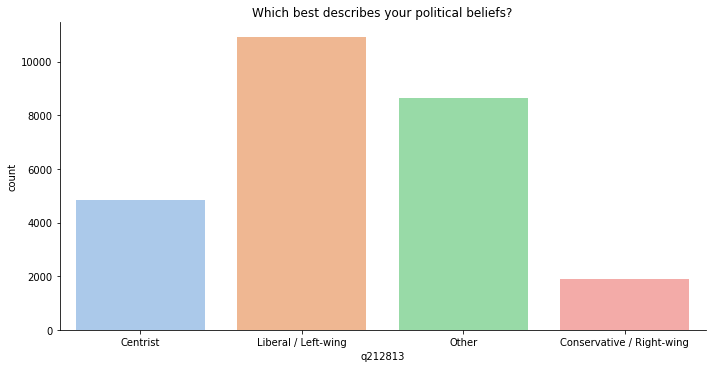

In [8]:
sns.catplot(data=feature_target_df, x='q212813', kind="count", palette="pastel", aspect=2).set(title=questions.loc['q212813', 'text'])

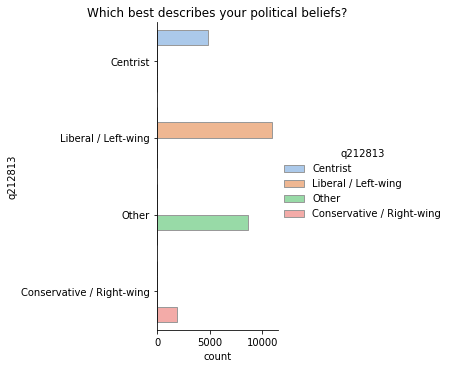

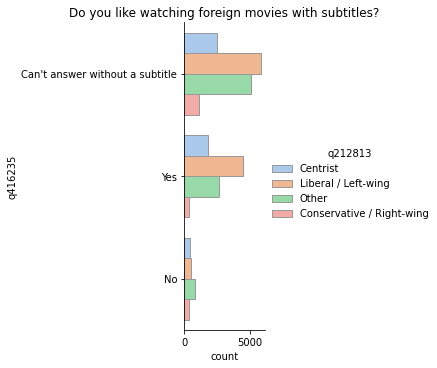

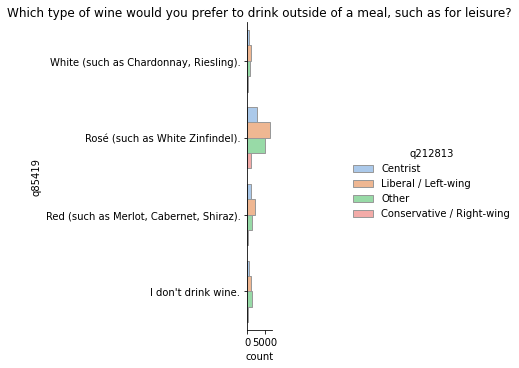

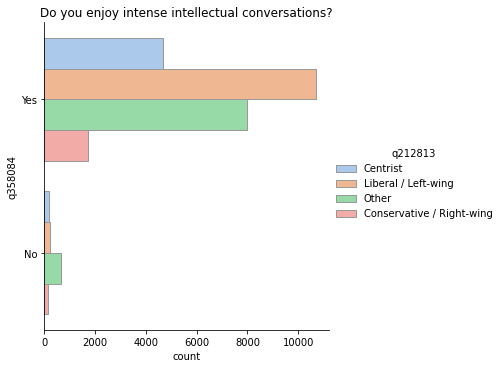

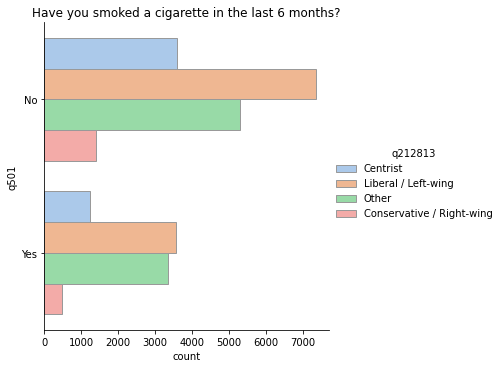

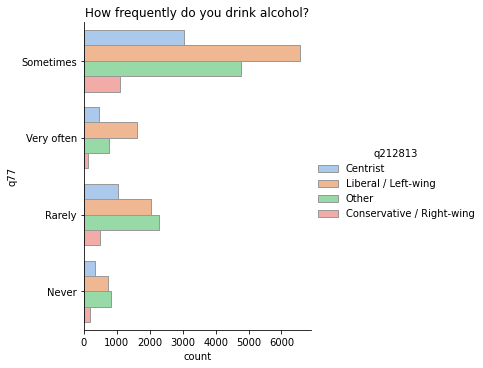

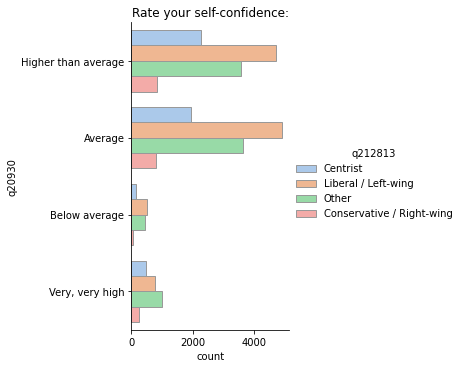

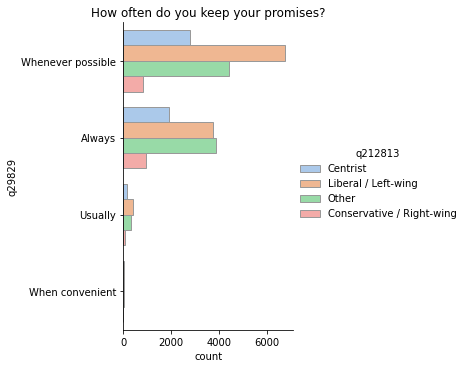

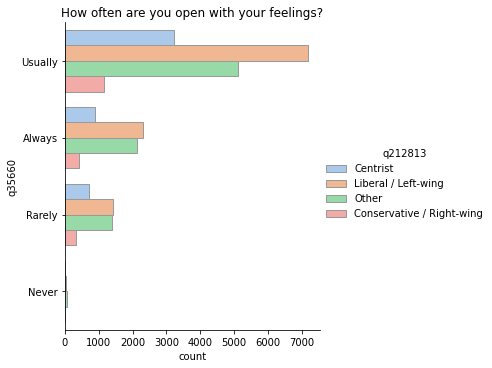

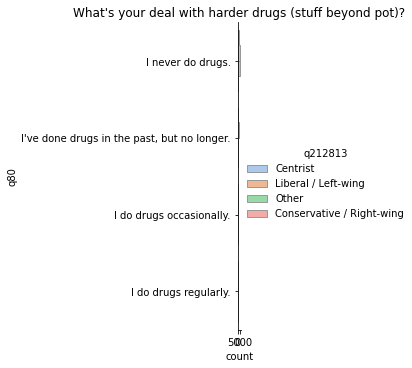

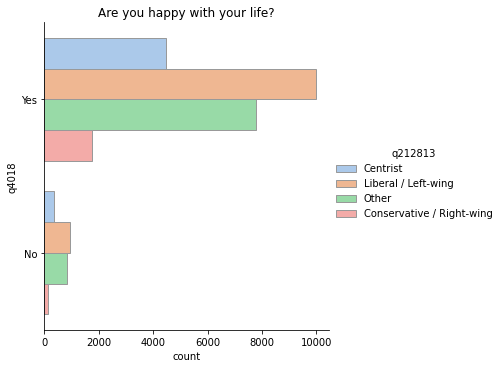

In [10]:
for question in selected_questions:
    plotting.plot_question_distribution(question, feature_target_df, questions)